<a href="https://colab.research.google.com/github/dellavecchiaemiliano/Econometrics_for_finance/blob/main/Alternative_risk_measures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pandas-datareader

!pip install --upgrade pandas

In [ ]:
!pip install fredapi

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from fredapi import Fred
import pandas_datareader as pdr


start = dt.datetime(2019, 11, 14)
end = dt.datetime(2022, 11, 15)

fred=Fred(api_key='215829915c8ac83922b316b046c974d5')
rf = pdr.DataReader('DTB3','fred',start,end)
rf=rf['DTB3'].mean()/100
tickers = ['TSLA', 'UBER', 'AMZN', 'PYPL', 'META', 'LYFT']

portfolio = web.DataReader(tickers,
                        'yahoo', start, end)['Adj Close']
portfolio.head()
 

Symbols,TSLA,UBER,AMZN,PYPL,META,LYFT
Date,,,,,,
2019-11-14,23.290001,25.990000,87.730003,103.730003,193.149994,41.919998
2019-11-15,23.478001,26.790001,86.974503,104.199997,195.100006,43.040001
2019-11-18,23.332666,26.750000,87.626503,103.660004,197.399994,44.860001
2019-11-19,23.968000,27.049999,87.639503,104.949997,199.320007,44.150002
2019-11-20,23.481333,28.030001,87.276497,104.089996,197.509995,43.950001


Symbols         TSLA      UBER      AMZN      PYPL      META      LYFT  \
Date                                                                     
2019-11-15  0.008072  0.030781 -0.008612  0.004531  0.010096  0.026718   
2019-11-18 -0.006190 -0.001493  0.007496 -0.005182  0.011789  0.042286   
2019-11-19  0.027229  0.011215  0.000148  0.012444  0.009727 -0.015827   
2019-11-20 -0.020305  0.036229 -0.004142 -0.008194 -0.009081 -0.004530   
2019-11-21  0.007410  0.051017 -0.006199 -0.014795  0.002126  0.063936   
...              ...       ...       ...       ...       ...       ...   
2022-11-09 -0.071668 -0.032434 -0.042676 -0.030198  0.051830 -0.023853   
2022-11-10  0.073934  0.086629  0.121778  0.103203  0.102493  0.060150   
2022-11-11  0.027527  0.010399  0.043051  0.048733  0.010280  0.125887   
2022-11-14 -0.025616 -0.002744 -0.022820 -0.016698  0.010618  0.019685   
2022-11-15  0.018172  0.085999  0.004569  0.003910  0.025039  0.009266   

Symbols     Portfolio  
Date         

<AxesSubplot: xlabel='Date'>

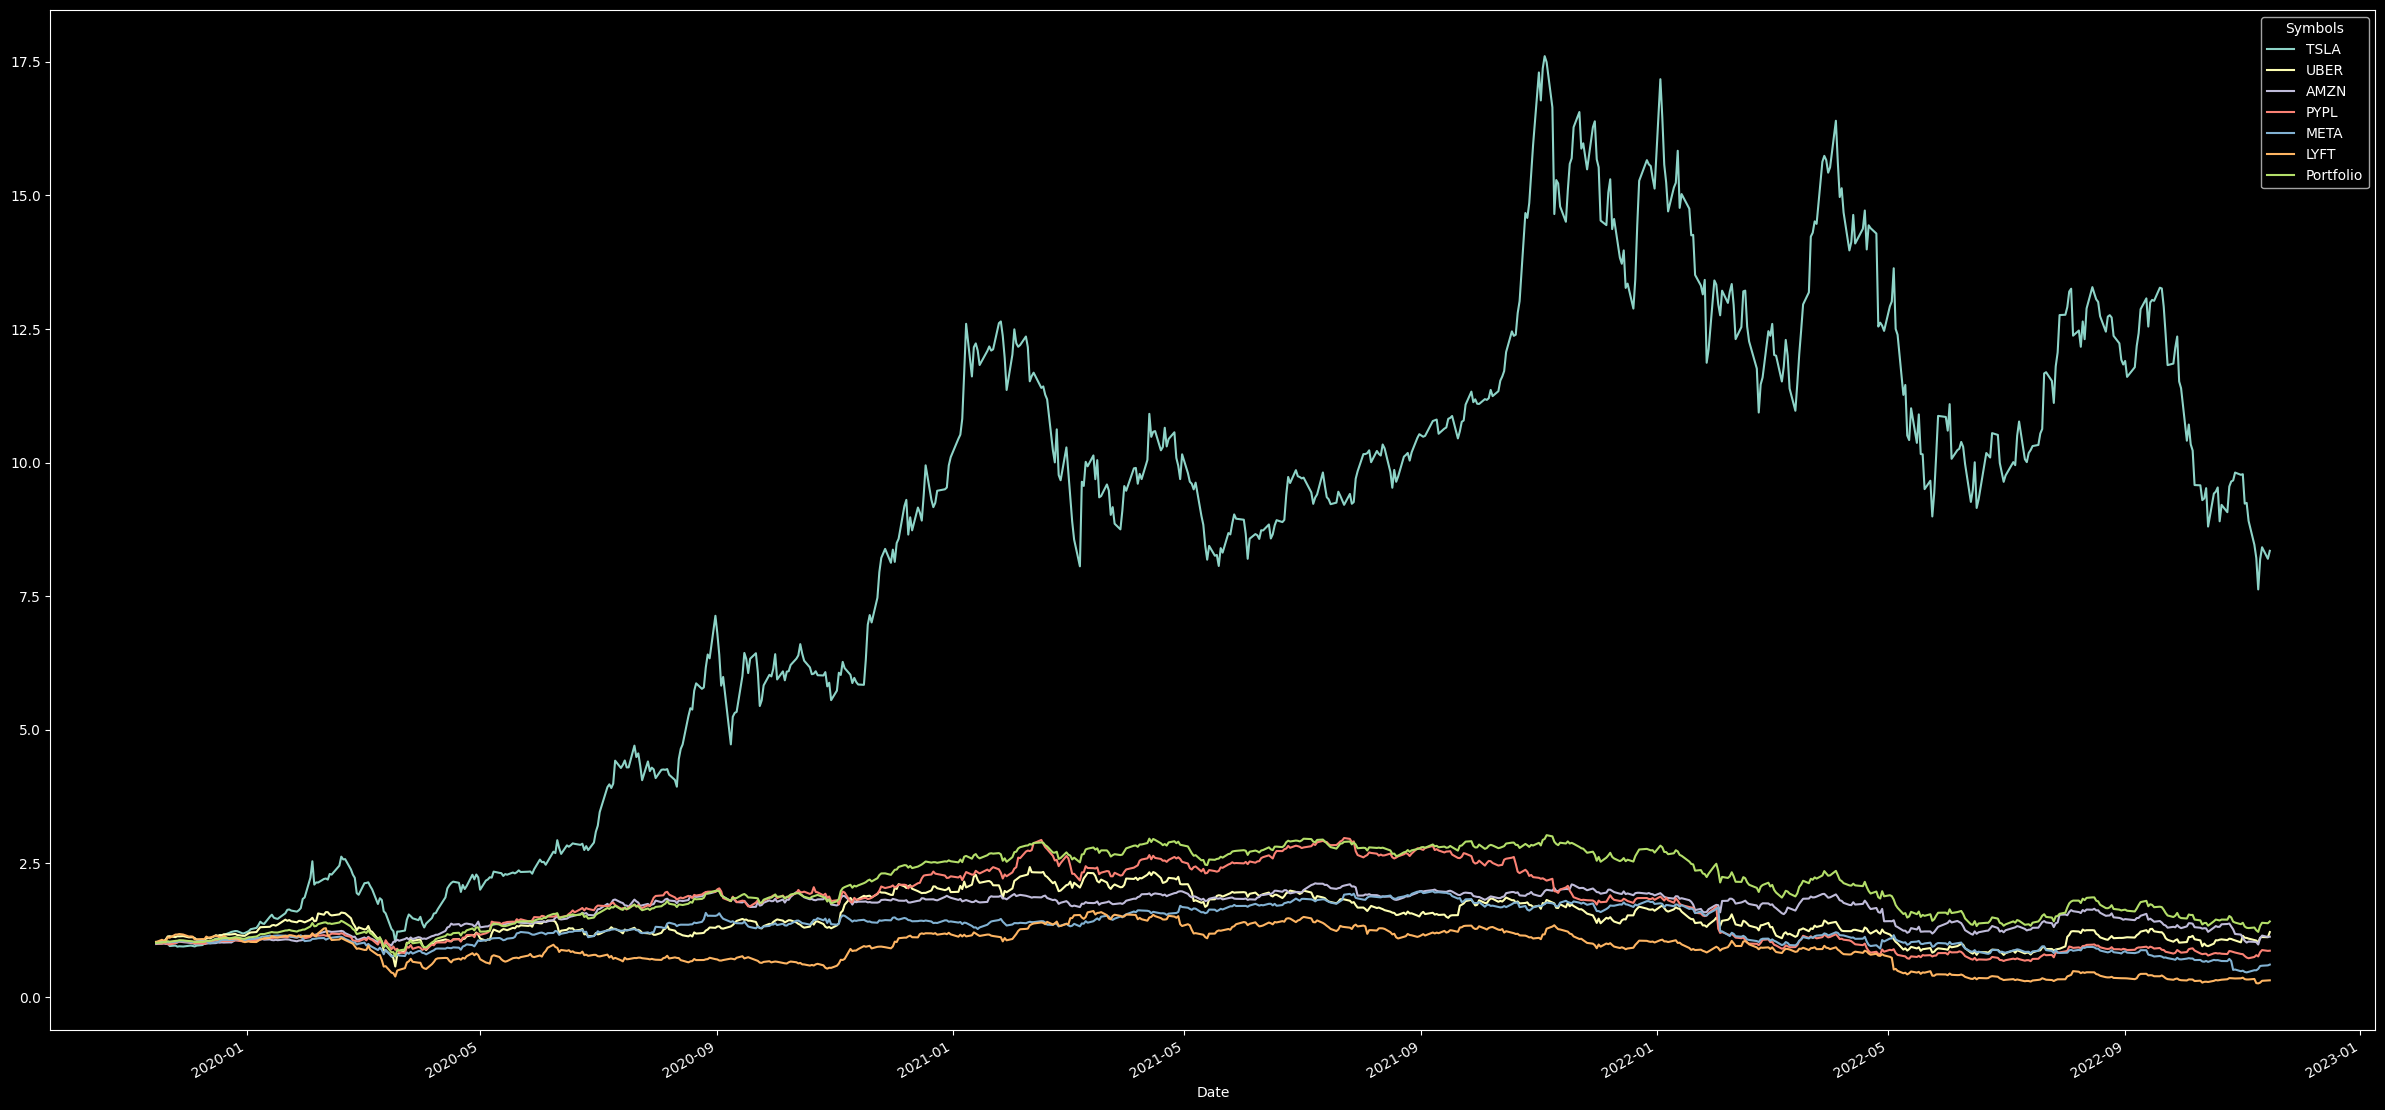

In [ ]:
df = portfolio.pct_change().dropna()
df['Portfolio'] = df.mean(axis=1)
plt.rcParams['figure.figsize'] = [30, 15]
plt.style.use("dark_background")
print(df)
(df+1).cumprod().plot()

#Sharpe Ratio

Sharpe ratio adjusts the return of an investment by the risk taken to achieve it. It's computed by dividing the excess return earned (over the risk-free rate or a benchmark) by the standard deviation of the returns (proxy for the risk taken).

***Sharpe ratio***$\begin{aligned}=\frac{R_p - R_f}{\sigma}\end{aligned}$

Most commonly, Sharpe ratio is used to compare various investment strategies or help in making decisions about adding a new asset to an existing portfolio.

Some pitfalls of Sharpe ratio:

*   Lengthening the time intervals to obtain lower estimate of volatility
*   Cherry-picking the most favorable stretch of performance
*   Markets being subject to serial correlation lowers the volatility
*   Best suited for symmetrical probability distribution curves
*   Its utility hinges on the assumption that the past returns have some predictive value








Symbols
TSLA         1.343642
UBER         0.398216
AMZN         0.278783
PYPL         0.141956
META        -0.113888
LYFT        -0.156496
Portfolio    0.467298
dtype: float64


<AxesSubplot: title={'center': 'Sharpe Ratios'}, xlabel='Symbols', ylabel='Sharpe Ratios'>

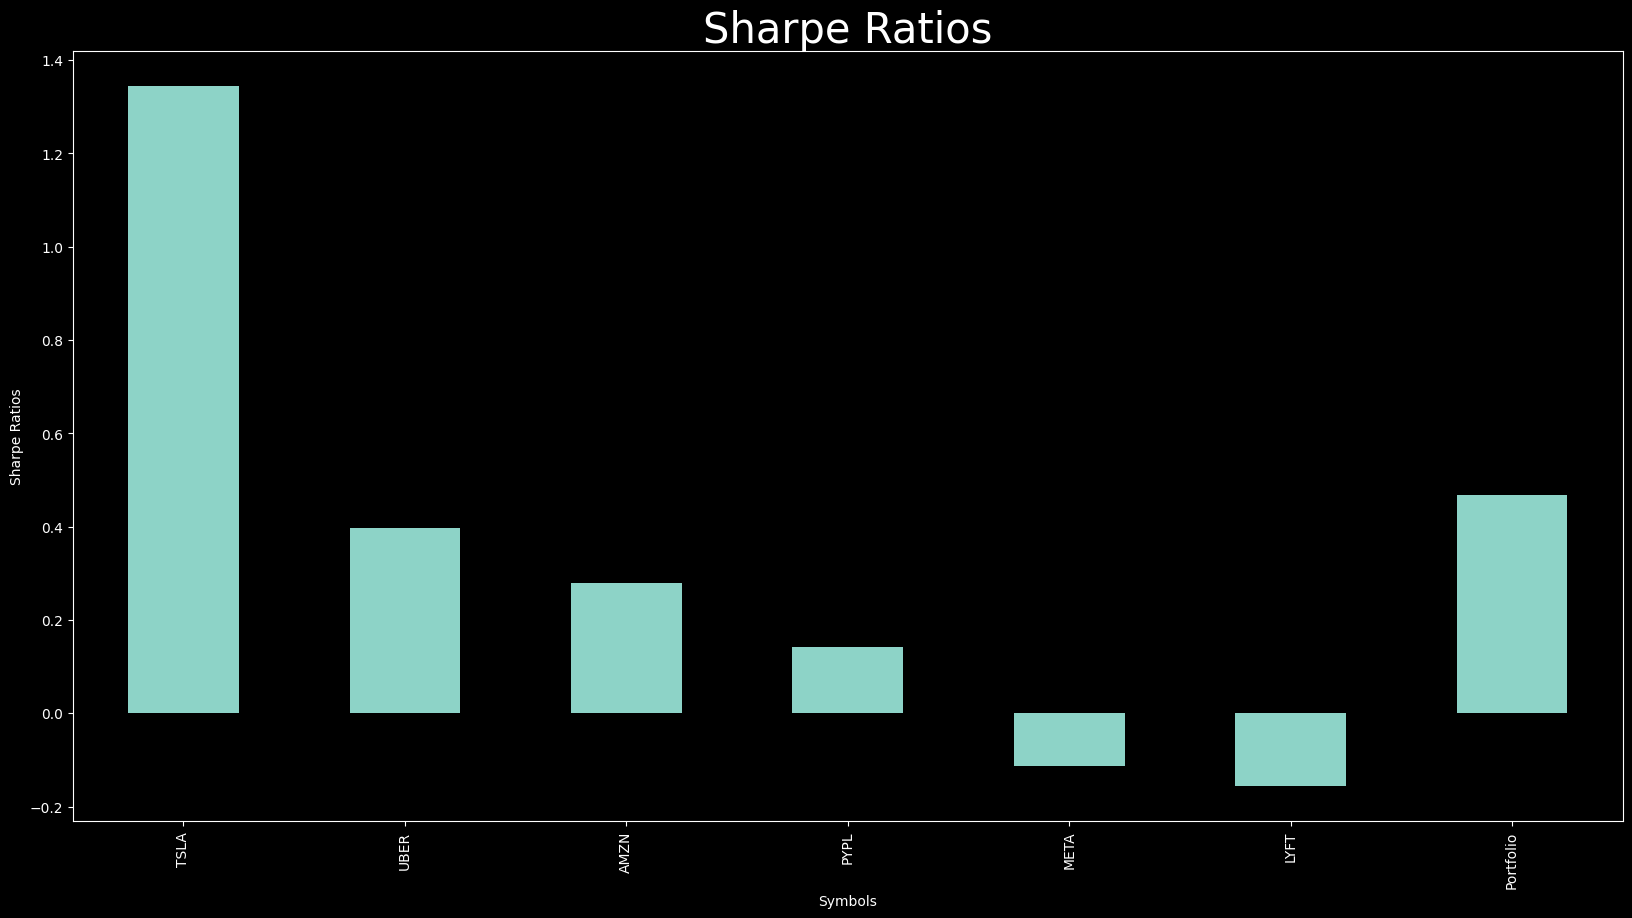

In [ ]:
N = 252 

def sharpe_ratio(return_series, N, rf):
    average = return_series.mean() * N -rf
    std_portfolio = return_series.std() * np.sqrt(N)
    return average / std_portfolio

sharpes = df.apply(sharpe_ratio, args=(N,rf),axis=0)


print(sharpes)
plt.style.use("dark_background")
plt.rcParams['figure.figsize'] = [20, 10]
plt.title("Sharpe Ratios", size=30)
plt.ylabel("Sharpe Ratios")
sharpes.plot.bar()

#Sortino ratio

The Sortino ratio is an alternative to the Sharpe ratio because it considers only the downside deviation, which is the asset's standard deviation of negative portfolio returns, instead the total asset's standard deviation. It means that the Sortino ratio takes into account only the harmful volatility.


***Sortino ratio*** $\begin{aligned}=\frac{R_p - R_f}{\sigma_d}
\end{aligned}$

The Sortino Ratio is a useful way for operators to evaluate an investment's return for a given level of bad risk. Since this ratio uses only the downside deviation as its risk measure, it addresses the problem of using total risk, or standard deviation, which is important because upside volatility is beneficial to investors and it isn't a factor most investors worry about.

Symbols
TSLA         1.958035
UBER         0.659045
AMZN         0.399009
PYPL         0.199114
META        -0.135635
LYFT        -0.226441
Portfolio    0.652648
dtype: float64


<AxesSubplot: title={'center': 'Sortino Ratio'}, xlabel='Symbols'>

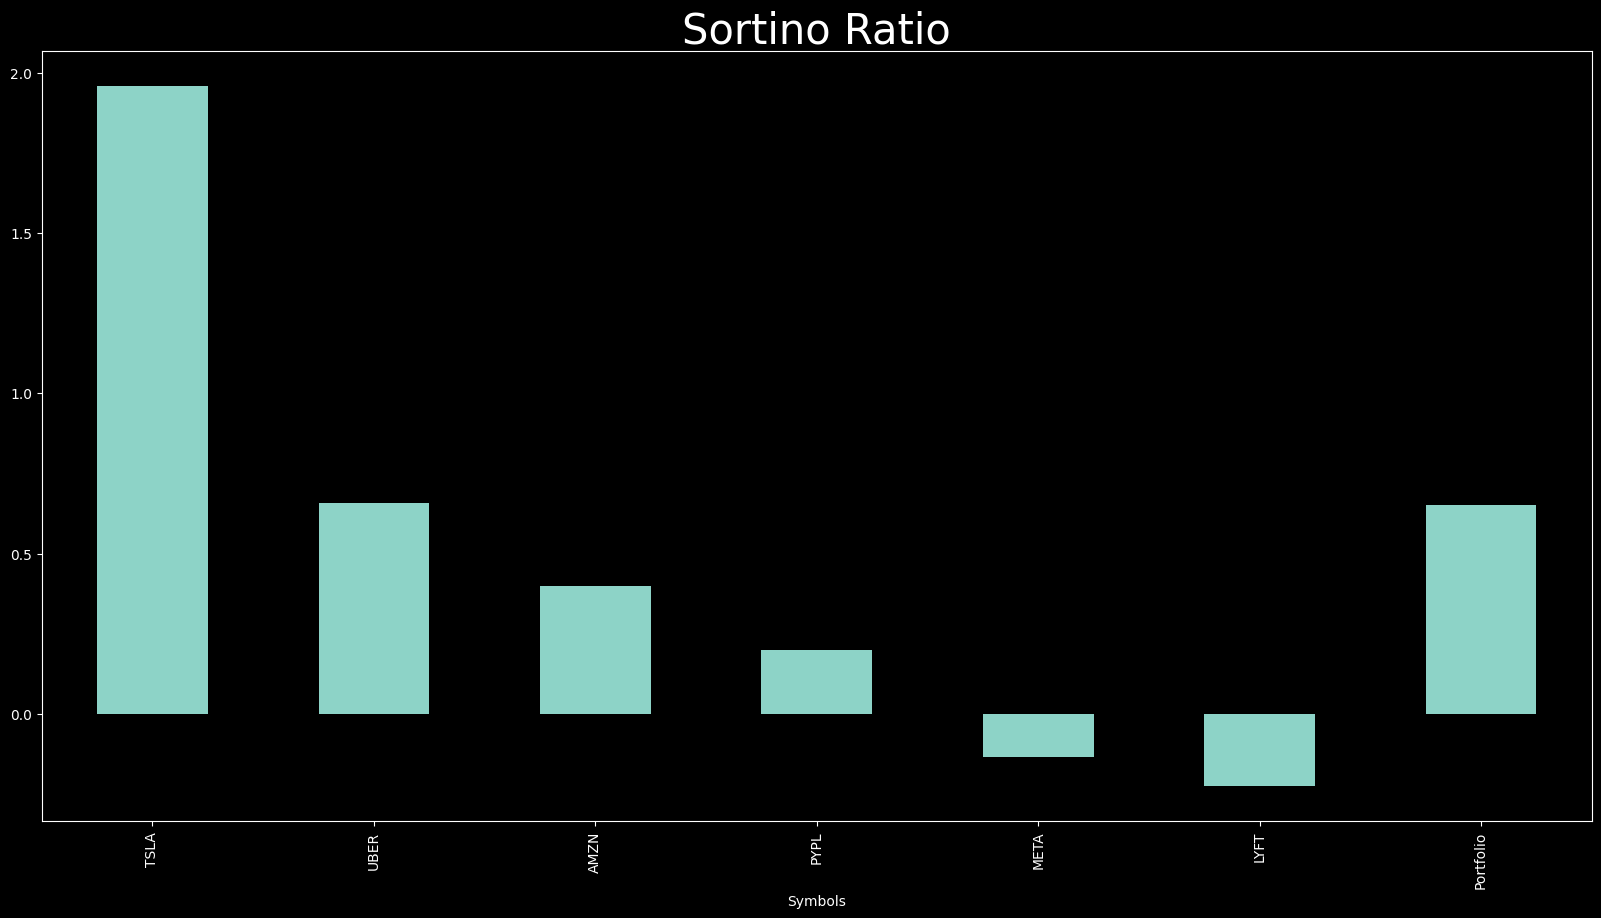

In [ ]:
def sortino(series, N,rf):
    average = series.mean() * N -rf
    negstd_portfolio = series[series<0].std()*np.sqrt(N)
    return average/negstd_portfolio


sortinos = df.apply(sortino, args=(N,rf), axis=0 )
print(sortinos)
plt.style.use("dark_background")
plt.rcParams['figure.figsize'] = [20, 10]
plt.title("Sortino Ratio", size=30)
sortinos.plot.bar()

#Maximum Drawdown

Maximum drawdown is a specific measure of drawdown that looks for the greatest movement from a high point to a low point, before a new peak is achieved.
It's important to note that it only measures the size of the largest loss, without taking into consideration the frequency of large losses.
Because it measures only the largest drawdown, MDD does not indicate how long it took an investor to recover from the loss, or if the investment even recovered at all.

Maximum drawdown (MDD) is an indicator used to assess the relative riskiness of one stock screening strategy versus another, as it focuses on capital preservation.
Two screening strategies can have the same average outperformance, tracking error, and volatility, but their maximum drawdowns compared to the benchmark can be very different.


***MDD*** $\begin{aligned}=\frac{trough - peak}{peak}\end{aligned}$


A low maximum drawdown is preferred as this indicates that losses from investment were small. If an investment never lost, the maximum drawdown would be zero. The worst possible maximum drawdown would be -100%, meaning the investment is completely worthless.



Symbols
TSLA        -0.606265
UBER        -0.676163
AMZN        -0.538298
PYPL        -0.774576
META        -0.767361
LYFT        -0.842183
Portfolio   -0.597552
dtype: float64


<AxesSubplot: title={'center': 'Max Drawdown'}, xlabel='Symbols'>

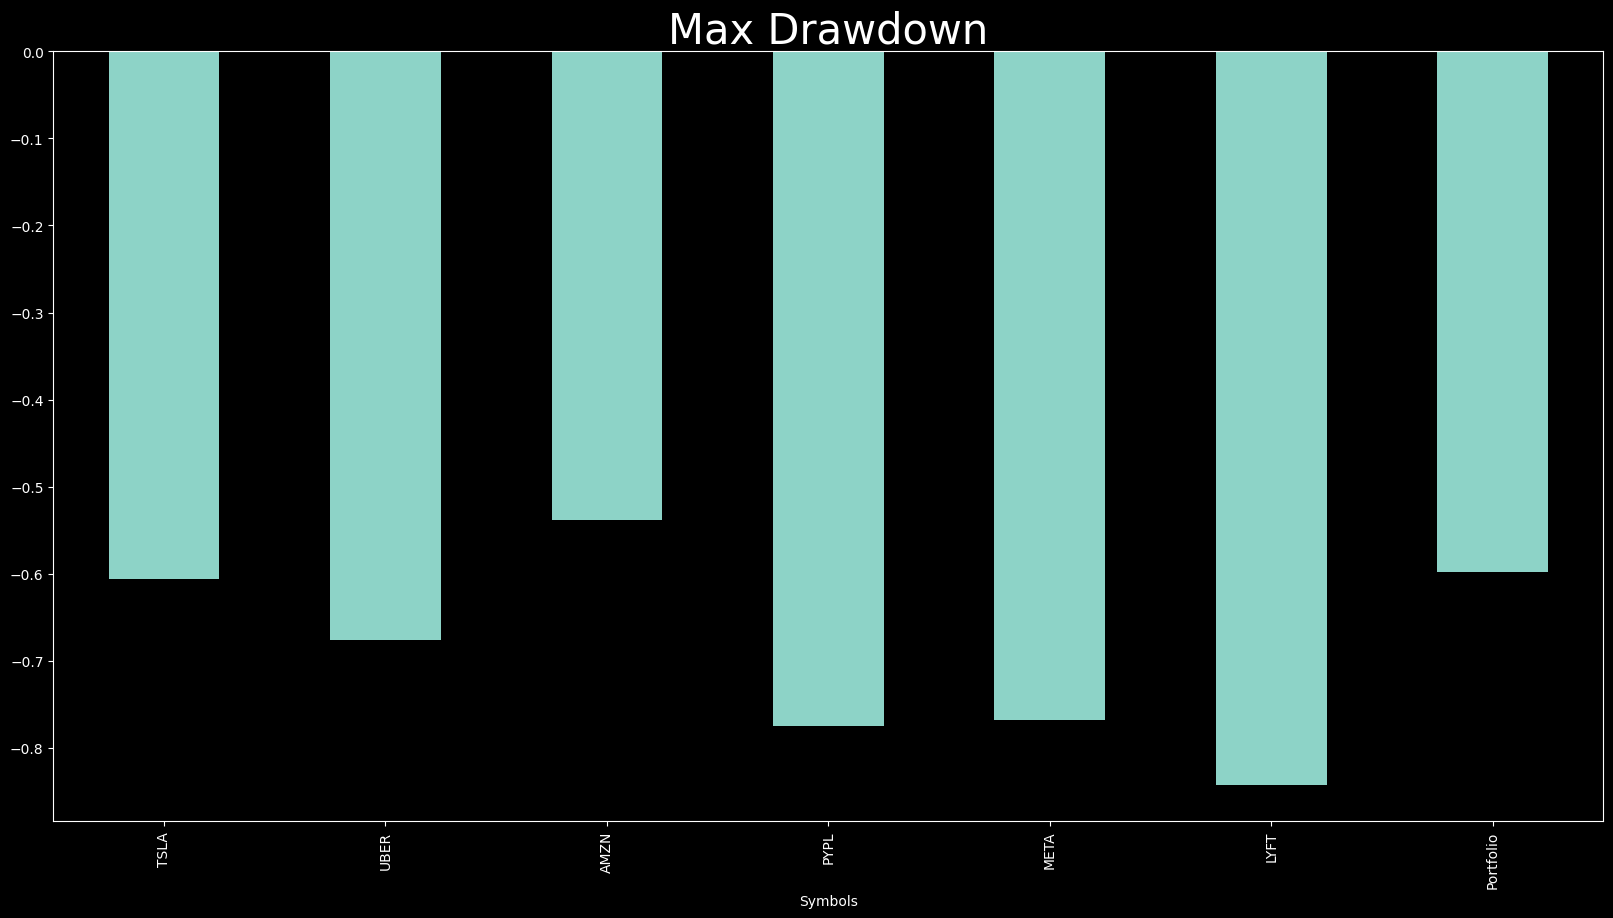

In [ ]:
def max_drawdown(return_series):
    trough = (return_series+1).cumprod()
    peak = trough.expanding(min_periods=1).max()
    draw = (trough/peak)-1
    return draw.min()


max_drawdowns = df.apply(max_drawdown,axis=0)
print(max_drawdowns)
plt.style.use("dark_background")
plt.rcParams['figure.figsize'] = [20, 10]
plt.title("Max Drawdown", size=30)
max_drawdowns.plot.bar()

#Calmar ratio

Calmar Ratio is a metric that measures the risk-adjusted performance of a portfolio. It is similar to the Sharpe ratio but uses the maximum drawdown as a measure of risk.


***Calmar ratio*** $\begin{aligned}=\frac{AAR}{MDD}\end{aligned}$

When comparing investment funds or portfolios with each other, investors should consider both the profitability of the investment and the risks associated with it. And funds that show higher returns without taking on greater risks are considered to be better investments. The Calmar ratio is designed to help understand whether a higher return is associated with a higher risk or not.

***Negative Calmar ratio*** means the risk-free rate is higher than the portfolio's return. Values ​​below zero do not convey any meaningful information.

***The Calmar ratio from 0 to 1.0*** indicates that the portfolio's profit does not exceed the maximum drawdown for a given period.

***The Calmar ratio of more than 1.0*** shows that the profit slightly exceeds the drawdown. This investment could be considered risky.




Symbols
TSLA         1.581381
UBER         0.380326
AMZN         0.213150
PYPL         0.100336
META        -0.062127
LYFT        -0.130184
Portfolio    0.348935
dtype: float64


<AxesSubplot: title={'center': 'Calmar'}, xlabel='Symbols'>

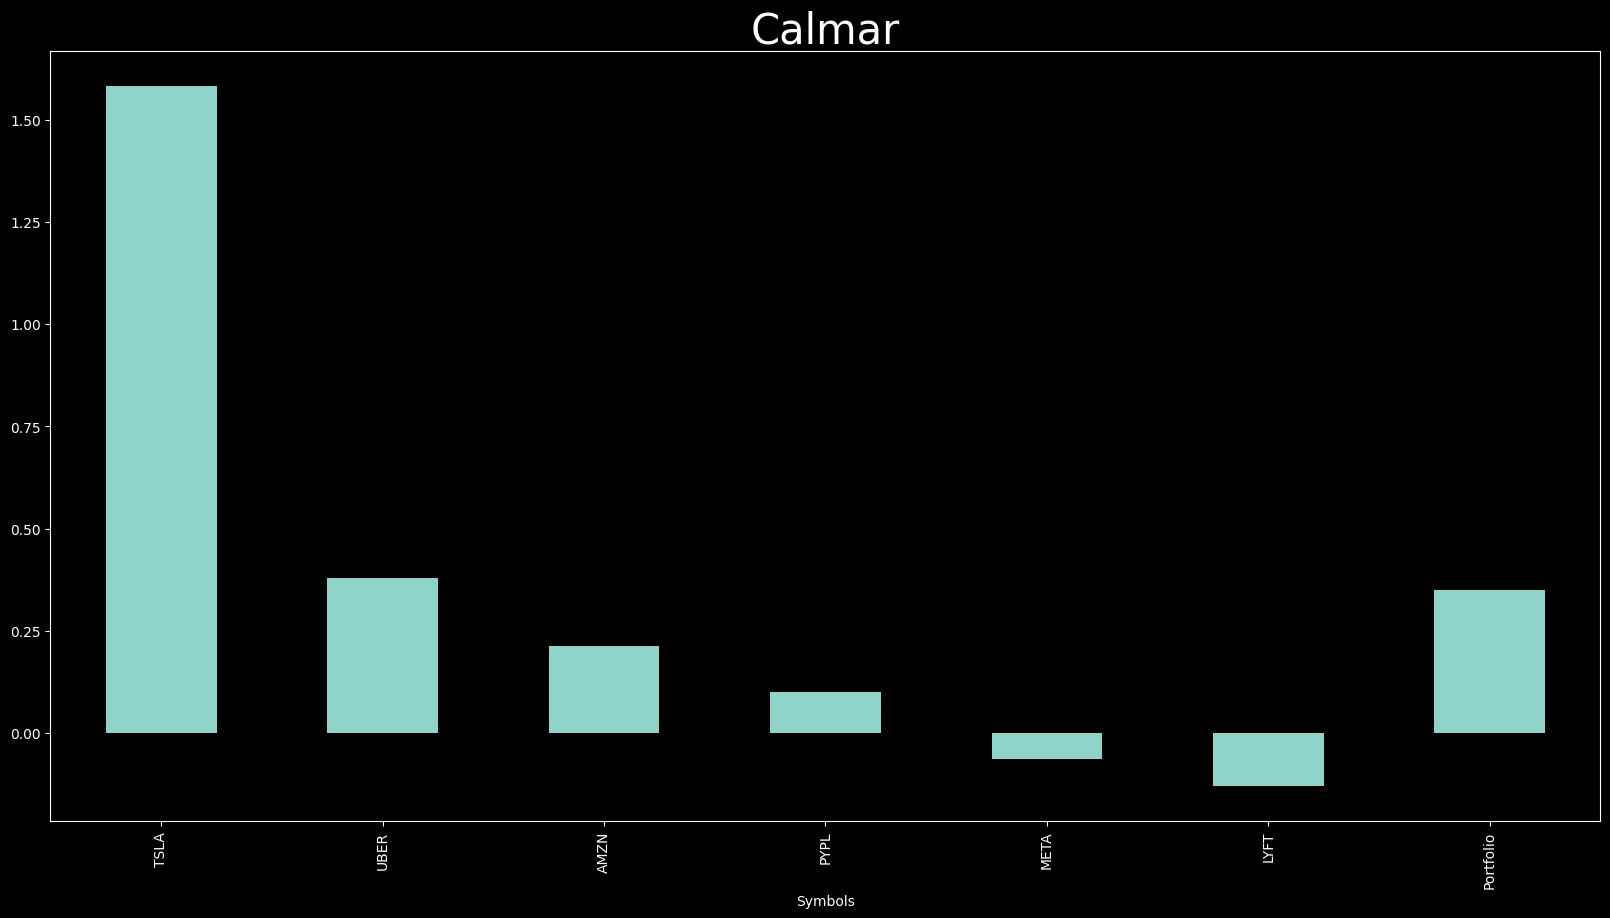

In [ ]:
calmars = df.mean()*N/abs(max_drawdowns)
print(calmars)
plt.style.use("dark_background")
plt.rcParams['figure.figsize'] = [20, 10]
plt.title("Calmar", size=30)
calmars.plot.bar()

In [ ]:
portfolio_ratios = pd.DataFrame()
portfolio_ratios["Sharpe"] = sharpes.round(2)
portfolio_ratios["Sortino"] = sortinos.round(2)
portfolio_ratios["MaxDrawdown"] = max_drawdowns.round(2)
portfolio_ratios["Calmar"] = calmars.round(2)

portfolio_ratios

,Sharpe,Sortino,MaxDrawdown,Calmar
Symbols,,,,
TSLA,1.34,1.96,-0.61,1.58
UBER,0.40,0.66,-0.68,0.38
AMZN,0.28,0.40,-0.54,0.21
PYPL,0.14,0.20,-0.77,0.10
META,-0.11,-0.14,-0.77,-0.06
LYFT,-0.16,-0.23,-0.84,-0.13
Portfolio,0.47,0.65,-0.60,0.35
